MNIST Digit Classification using SVC
Loading MNIST data...
Training data shape: (60000, 784)
Test data shape: (10000, 784)

Visualizing sample images...


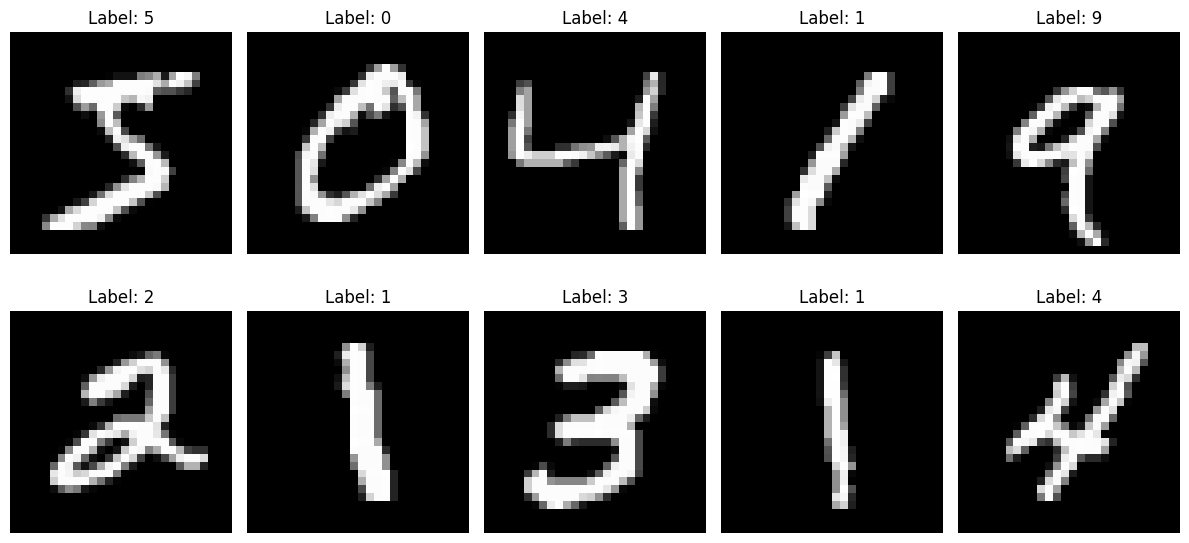

Preprocessing data...
Training SVC model on full 60k training samples...
Training completed in 300.78 seconds

Evaluating model performance...
Making predictions...
F1-Score (Macro): 0.9659
F1-Score (Micro): 0.9661
F1-Score (Weighted): 0.9661

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      

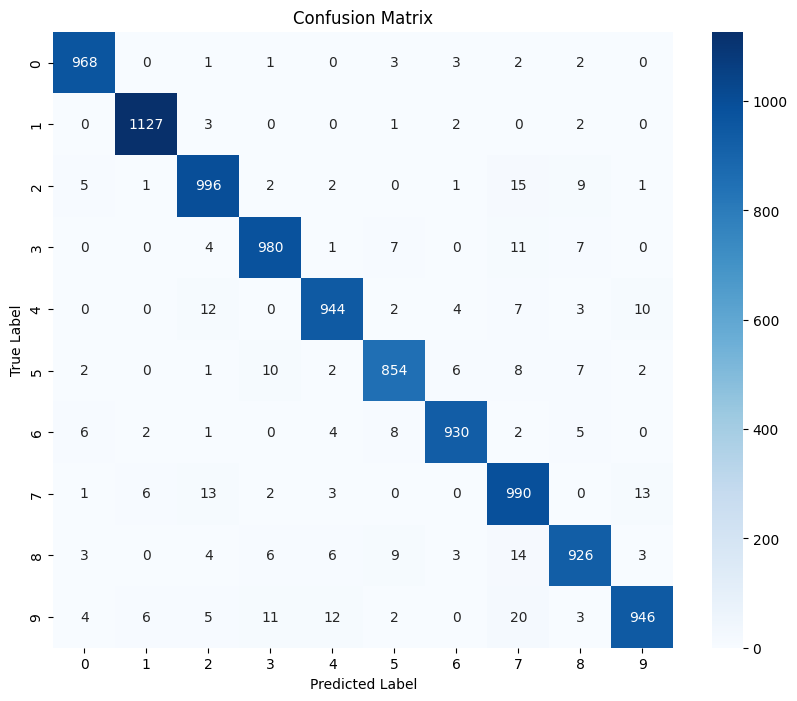

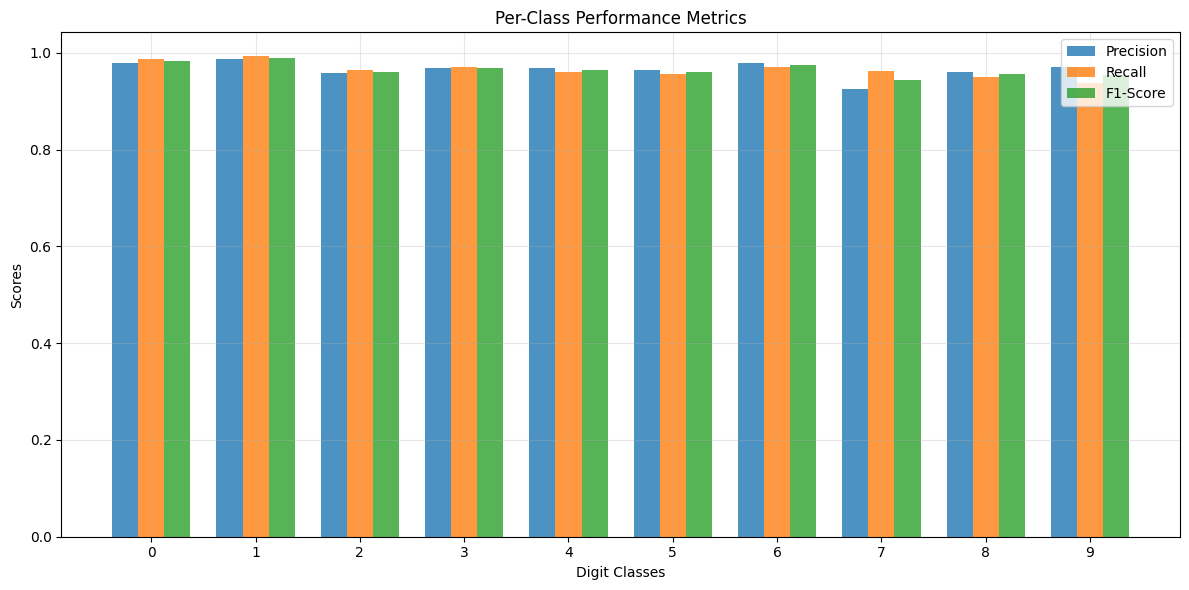

Model saved as mnist_svc_model.pkl

FINAL RESULTS SUMMARY
Overall F1-Score (Macro): 0.9659
Overall F1-Score (Micro): 0.9661
Overall F1-Score (Weighted): 0.9661
✓ Target F1-Score of 0.95 achieved!


In [1]:
#importing all the neccesary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

def load_mnist_data():
    #loading the MNIST dataset from idx files (provided kaggle link)
    def load_images(filename):
        with open(filename, 'rb') as f:
            f.read(16)  #skip header
            data = np.frombuffer(f.read(), dtype=np.uint8)
            return data.reshape(-1, 784)
    
    def load_labels(filename):
        with open(filename, 'rb') as f:
            f.read(8)  #skip header
            return np.frombuffer(f.read(), dtype=np.uint8)
    
    #loading training and test data
    train_images = load_images('data/train-images.idx3-ubyte')
    train_labels = load_labels('data/train-labels.idx1-ubyte')
    test_images = load_images('data/t10k-images.idx3-ubyte')
    test_labels = load_labels('data/t10k-labels.idx1-ubyte')
    
    return train_images, train_labels, test_images, test_labels

def preprocess_data(X_train, X_test):
    #normalizing pixel values to 0-1 range
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    #standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, scaler

def visualize_samples(X, y, n_samples=10):
    #displaying sample images
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(n_samples):
        ax = axes[i//5, i%5]
        ax.imshow(X[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {y[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def train_svc_model(X_train, y_train):
    #training SVC with RBF kernel on full dataset
    print("Training SVC model on full 60k training samples...")
    start_time = time.time()
    
    #SVC with optimized parameters for full dataset
    svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, cache_size=1000)
    svc.fit(X_train, y_train)
    
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds")
    
    return svc

def evaluate_model(model, X_test, y_test):
    #making predictions
    print("Making predictions...")
    y_pred = model.predict(X_test)
    
    #calculating metrics
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print(f"F1-Score (Macro): {f1_macro:.4f}")
    print(f"F1-Score (Micro): {f1_micro:.4f}")
    print(f"F1-Score (Weighted): {f1_weighted:.4f}")
    
    #detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return y_pred, f1_macro, f1_micro, f1_weighted

def plot_confusion_matrix(y_test, y_pred):
    #creating confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_class_performance(y_test, y_pred):
    #plotting per-class performance
    report = classification_report(y_test, y_pred, output_dict=True)
    
    classes = [str(i) for i in range(10)]
    precision = [report[c]['precision'] for c in classes]
    recall = [report[c]['recall'] for c in classes]
    f1 = [report[c]['f1-score'] for c in classes]
    
    x = np.arange(len(classes))
    width = 0.25
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
    ax.bar(x, recall, width, label='Recall', alpha=0.8)
    ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)
    
    ax.set_xlabel('Digit Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Per-Class Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def save_model(model, scaler, filename='mnist_svc_model.pkl'):
    #saving the trained model and scaler
    with open(filename, 'wb') as f:
        pickle.dump({'model': model, 'scaler': scaler}, f)
    print(f"Model saved as {filename}")

def main():
    print("MNIST Digit Classification using SVC")
    print("=" * 40)
    
    #loading data
    print("Loading MNIST data...")
    X_train, y_train, X_test, y_test = load_mnist_data()
    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")
    
    #visualizing sample data
    print("\nVisualizing sample images...")
    visualize_samples(X_train, y_train)
    
    #preprocessing data
    print("Preprocessing data...")
    X_train_scaled, X_test_scaled, scaler = preprocess_data(X_train, X_test)
    
    #training the model
    svc_model = train_svc_model(X_train_scaled, y_train)
    
    #evaluating the model
    print("\nEvaluating model performance...")
    y_pred, f1_macro, f1_micro, f1_weighted = evaluate_model(svc_model, X_test_scaled, y_test)
    
    #plotting results
    print("\nGenerating performance plots...")
    plot_confusion_matrix(y_test, y_pred)
    plot_class_performance(y_test, y_pred)
    
    #saving the model
    save_model(svc_model, scaler)
    
    #final results summary
    print("\n" + "=" * 40)
    print("FINAL RESULTS SUMMARY")
    print("=" * 40)
    print(f"Overall F1-Score (Macro): {f1_macro:.4f}")
    print(f"Overall F1-Score (Micro): {f1_micro:.4f}")
    print(f"Overall F1-Score (Weighted): {f1_weighted:.4f}")
    
    if f1_macro > 0.95:
        print("✓ Target F1-Score of 0.95 achieved!")
    else:
        print("✗ Target F1-Score of 0.95 not achieved.")

if __name__ == "__main__":
    main()